### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

-- Answer-- 

-The independent variable is the test type or condition (congruent or incongruent).

-The dependent variable is the time being taken to achieve the test(read through the words).


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

--Answer--

During this test I will try to answer the quiestion of wheather the average time being taken in reading the incongruent words is equal  or somehow different than the average time being taken in reading  the congruent words?  So the null and alternative hypothesis would be :

Null hypothesis : 

H0 : μI - μC =0

Alternative hypothesis:

H1 : μI - μC ≠0

in which:
μI is the mean time in incongruent test.
μC is the mean time in congruent test.



(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
# inline matplotlib


In [8]:
df=pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


**Get some perspective about the dataset dimensions**

In [3]:
df.shape

(24, 2)

We have 24 rows and just two columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


Data seems fine with no null values 

**Find the difference between Incongruent and congruent columns **

In [5]:
df['Incongruent']- df['Congruent']

0      7.199
1      1.950
2     11.650
3      7.057
4      8.134
5      8.640
6      9.880
7      8.407
8     11.361
9     11.802
10     2.196
11     3.346
12     2.437
13     3.401
14    17.055
15    10.028
16     6.644
17     9.790
18     6.081
19    21.919
20    10.950
21     3.727
22     2.348
23     5.153
dtype: float64

The difference is always positive which indicates that incongruent time is more than congruent time in this sample

**Means of both Congruent,Incongruent columns**

In [6]:
df['Congruent'].mean(),df['Incongruent'].mean()

(14.051124999999999, 22.015916666666666)

**Medians  of both Congruent,Incongruent columns**

In [25]:
df['Congruent'].median(),df['Incongruent'].median()

(14.3565, 21.017499999999998)

Finding the mode is  meaningless considering that there is no value appears more than once in the dataset.

According to the mean and median for both cases, they are approximately the same, so we have a normal distribution to an extent with no extreme values or outliers( to be fully normal distributed mean should be equall median and mode), but in the nextvisulization it will be clear that it is not fully normally distributed due to some outliers.

**Measure of Variability**

In [26]:
df['Congruent'].var(),df['Incongruent'].var()  #  find the Variance

(12.669029070652176, 23.011757036231884)

In [27]:
df['Congruent'].std(),df['Incongruent'].std() #  find the standard deviation

(3.5593579576451955, 4.7970571224691376)

In [28]:
df['Congruent'].max()-df['Congruent'].min(),df['Incongruent'].max()-df['Incongruent'].min() # calculating the range of data

(13.698000000000002, 19.568000000000001)

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

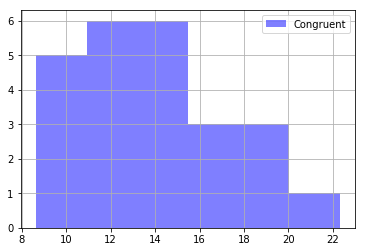

In [29]:
# Build the visualizations here
df['Congruent'].hist( bins='auto', color='blue', alpha=0.5, label='Congruent')
plt.legend()

In [ ]:
This hist plot of congruent test results shows that it is more like right skew distribution .

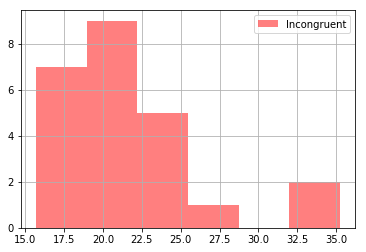

In [30]:
df['Incongruent'].hist(bins='auto', color='red', alpha=0.5, label='Incongruent')
plt.legend()

This hist plot of Incongruent test results shows that it is more like right skew distribution also with some outliers .

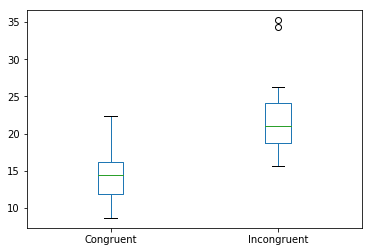

In [31]:
df.plot(kind='box')

According to the boxplot above:
 the reaction time spent in reading  incongruent words condition appears to be longer than that of the congruent words condition, which is consistent with the sample statistics generated earlier. Also,the distribution of the sample data from the Incongruent group is likely to be right skewed due to two outliners.

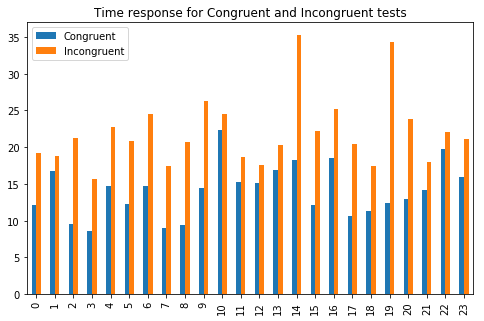

In [39]:
df.plot(figsize=(8, 5), title='Time response for Congruent and Incongruent tests', kind='bar');


This bar chart above is much clear showing that For every congruent test, Incongruent  response time is higher. For all test cases

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

I will be using a paired T Test to compare Congruent and Incongruent means  (A paired t-test is used to compare two population means where you have two samples in which observations in one sample can be paired with observations in the other sample).This is exactly what we have here with the provided stroop data.
I will be using a confidence level of .05 in a two tailed test.


In [7]:
from scipy import stats
stats.ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

-- Answer --

Acoording to the p_value( the probability of observing a statistic or one more extreme in favor of the alternative) which appears to have a very small value  , I  reject the null hypothesis which means that alternative  hypothesis (which is that the incorgunet data is different than those of congruent) is True , which is in consisitence with the data and visulaization shown above .

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

-- Answer --

I think the reason behind this delay in time in the incongruent test is the extra processing of the mind considering that in the first test human mind just focuses on one thing which is reading the word which is in consistence with the color it is writen by , but when mind find it self engaged in extra work which is in contridactory with another sense perceptual sense ,whcich is sight, mind then spends more time analysing and make choice between what the eye sees in color and what the letters give as words.

Links to websites:
http://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf
https://courses.lumenlearning.com/introstats1/chapter/measures-of-the-center-of-the-data/
https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740